# Tensorflow Basics

Notebook for taking notes and trialing out code for the Tensorflow 2.0 Basics tutorial (https://www.tensorflow.org/tutorials/quickstart/beginner).

In [1]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [ ]:
# Don't bake in softmax to last layer activation as this may not be numerically stable
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()

array([[0.08927496, 0.10330383, 0.10928493, 0.11002354, 0.13594468,
        0.0897333 , 0.03195685, 0.07866019, 0.09588695, 0.15593077]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Untrained model on one sample is close to random guess loss
print("Random guess loss: ", -tf.math.log(1/10).numpy()) # 10 categories
print("Our randomly initialised NN: ", loss_fn(y_train[:1], predictions).numpy())

Random guess loss:  2.3025851
Our randomly initialised NN:  2.4109135


In [ ]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2975 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1456 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1087 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0886 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0747 - accuracy: 0.9765


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0777 - accuracy: 0.9757 - 823ms/epoch - 3ms/step


[0.07769825309515, 0.9757000207901001]

In [ ]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.19425884e-07, 7.04326055e-08, 1.13522314e-04, 9.33228235e-04,
        9.16304740e-11, 2.87639725e-08, 2.44073069e-14, 9.98941243e-01,
        1.06827565e-06, 1.01085170e-05],
       [2.45091480e-09, 1.73488627e-06, 9.99992967e-01, 4.47756020e-06,
        1.03192108e-15, 2.94239129e-07, 3.15649756e-10, 1.80449839e-12,
        4.35412460e-07, 1.11514302e-15],
       [7.95194183e-07, 9.97843385e-01, 2.20519389e-04, 4.52321729e-05,
        1.47831515e-05, 8.49116077e-06, 1.66183236e-05, 1.22564880e-03,
        6.23463013e-04, 1.01089847e-06],
       [9.99990463e-01, 8.69471595e-12, 6.67027462e-06, 9.99018024e-09,
        7.98088280e-08, 2.62063935e-07, 5.49779941e-07, 7.72450335e-07,
        2.61769673e-09, 1.09905511e-06],
       [2.48030437e-06, 4.00901179e-08, 1.73918652e-05, 1.42998226e-06,
        9.97058392e-01, 1.69980819e-06, 1.91434151e-06, 1.16038638e-04,
        5.97266137e-07, 2.80009792e-03]], dtype=float32)>

## More complex dataset

Use the CIFAR10 dataset to try a similar modelling technique using keras etc.

This dataset contains 60,000 32x32 colour images in 10 classes.

In [27]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

[9]


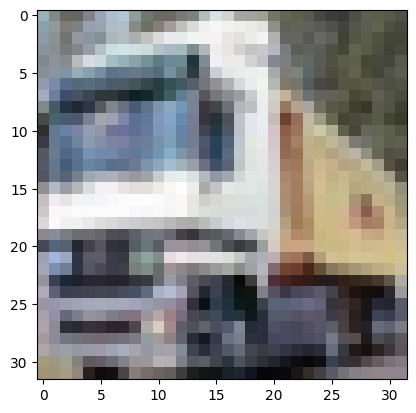

In [6]:
# Extremely low resolution images
from matplotlib import pyplot as plt

print(y_train[1])
plt.imshow(X_train[1])

In [29]:
import numpy

# Find the maximum pixel saturation
max_sat = numpy.amax(X_train)

# Normalise by the maximum saturation
training_data, test_data = tf.data.Dataset.from_tensor_slices(((X_train / max_sat), y_train)), tf.data.Dataset.from_tensor_slices(((X_test / max_sat), y_test))

In [30]:
example = training_data.take(1)

In [43]:
# Build a simple model using the Keras API
# Each image has 32 x 32 x 3 = 3072 values and last layer (producing the logits)
# requires 10 (for 10 categories).

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [59]:
# Define the loss function and compile the model with the loss function etc.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=loss_fn, metrics=["accuracy"])

In [54]:
# Batch the dataset

batched_dataset = training_data.batch(500)

In [61]:
# Fitting the model gives poor performance

model.fit(batched_dataset, batch_size=500, epochs=25)

Epoch 1/25
100/100 [==============================] - 5s 49ms/step - loss: 1.7858 - accuracy: 0.3488
Epoch 2/25
100/100 [==============================] - 4s 41ms/step - loss: 1.7776 - accuracy: 0.3549
Epoch 3/25
100/100 [==============================] - 3s 30ms/step - loss: 1.7748 - accuracy: 0.3529
Epoch 4/25
100/100 [==============================] - 3s 34ms/step - loss: 1.7706 - accuracy: 0.3563
Epoch 5/25
100/100 [==============================] - 4s 43ms/step - loss: 1.7684 - accuracy: 0.3598
Epoch 6/25
100/100 [==============================] - 3s 31ms/step - loss: 1.7628 - accuracy: 0.3607
Epoch 7/25
100/100 [==============================] - 5s 48ms/step - loss: 1.7575 - accuracy: 0.3623
Epoch 8/25
100/100 [==============================] - 3s 31ms/step - loss: 1.7537 - accuracy: 0.3629
Epoch 9/25
100/100 [==============================] - 3s 31ms/step - loss: 1.7485 - accuracy: 0.3677
Epoch 10/25
100/100 [==============================] - 4s 39ms/step - loss: 1.7478 - accura

In [ ]:
# TODO: Play around with layer sizes to see effect on outputs
#       Try loading a different dataset and building a model for that
#       Play around with some of the Keras additional functionality
#       Is there a nice way to store and compare results?